In [1]:
#!pip install pyreadr

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.4 MB/s eta 0:00:01
    --------------------------------------- 0.0/1.3 MB 1.4 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.3 MB 939.4 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.3 MB 1.9 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.3 MB 1.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.2/1.3 MB 5.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.2/1.3 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.1 MB/s eta 0:00:00


In [2]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt

__The Dataset__: 

Each .RData file is an external representation of an R dataframe. The variables loaded are named ‘fault_free_training’ and ‘faulty_training’, corresponding to the RData files.

Each dataframe contains 55 columns:

Column 1 ('faultNumber') ranges from 1 to 20 in the “Faulty” datasets and represents the fault type in the TEP. The “FaultFree” datasets only contain fault 0 (i.e. normal operating conditions).

Column 2 ('simulationRun') ranges from 1 to 500 and represents a different random number generator state from which a full TEP dataset was generated (Note: the actual seeds used to generate training and testing datasets were non-overlapping).

Column 3 ('sample') ranges either from 1 to 500 (“Training” datasets) or 1 to 960 (“Testing” datasets). The TEP variables (columns 4 to 55) were sampled every 3 minutes for a total duration of 25 hours and 48 hours respectively. Note that the faults were introduced 1 and 8 hours into the Faulty Training and Faulty Testing datasets, respectively.

Columns 4 to 55 contain the process variables; the column names retain the original variable name

__Fault description:__

Fault ID	Description	Type

1	A/C Feed ratio, B Composition constant	Step

2	B Composition, A/C Ratio constant	Step

3	D Feed temperature	Step

4	Reactor cooling water inlet temperature	Step

5	Condenser cooling water inlet temperature	Step

6	A Feed loss	Step

7	C Header pressure loss – reduced availability	Step

8	A, B, C Feed composition	Random variation

9	D Feed temperature	Random variation

10	C Feed temperature	Random variation

11	Reactor cooling water inlet temperature	Random variation

12	Condenser cooling water inlet temperature	Random variation

13	Reaction kinetics	Slow drift

14	Reactor cooling water valve	Sticking

15	Condenser cooling water valve	Sticking

16	Unknown	Random variation

17	Unknown	Random variation

18	Unknown	Step

19	Unknown	Random variation

20	Unknown	Random variation

__Import data__

In [32]:
#read the no faulty training data and print the key

result = pyreadr.read_r('../../data/TEP_FaultFree_Training.RData')
key=result.keys()
print(key)

odict_keys(['fault_free_training'])


In [33]:
#create pandas dataframe for train data

df_train = result['fault_free_training']
df_train.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [34]:
#read the faulty train data and print the key

result = pyreadr.read_r('../../data/TEP_Faulty_Training.RData')
key=result.keys()
print(key)

odict_keys(['faulty_training'])


In [35]:
#creation of faulty dataset

df_faulty = result['faulty_training']
df_faulty.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


__Data exploration__

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    250000 non-null  float64
 1   simulationRun  250000 non-null  float64
 2   sample         250000 non-null  int32  
 3   xmeas_1        250000 non-null  float64
 4   xmeas_2        250000 non-null  float64
 5   xmeas_3        250000 non-null  float64
 6   xmeas_4        250000 non-null  float64
 7   xmeas_5        250000 non-null  float64
 8   xmeas_6        250000 non-null  float64
 9   xmeas_7        250000 non-null  float64
 10  xmeas_8        250000 non-null  float64
 11  xmeas_9        250000 non-null  float64
 12  xmeas_10       250000 non-null  float64
 13  xmeas_11       250000 non-null  float64
 14  xmeas_12       250000 non-null  float64
 15  xmeas_13       250000 non-null  float64
 16  xmeas_14       250000 non-null  float64
 17  xmeas_15       250000 non-nul

In [37]:
df_faulty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 55 columns):
 #   Column         Dtype  
---  ------         -----  
 0   faultNumber    int32  
 1   simulationRun  float64
 2   sample         int32  
 3   xmeas_1        float64
 4   xmeas_2        float64
 5   xmeas_3        float64
 6   xmeas_4        float64
 7   xmeas_5        float64
 8   xmeas_6        float64
 9   xmeas_7        float64
 10  xmeas_8        float64
 11  xmeas_9        float64
 12  xmeas_10       float64
 13  xmeas_11       float64
 14  xmeas_12       float64
 15  xmeas_13       float64
 16  xmeas_14       float64
 17  xmeas_15       float64
 18  xmeas_16       float64
 19  xmeas_17       float64
 20  xmeas_18       float64
 21  xmeas_19       float64
 22  xmeas_20       float64
 23  xmeas_21       float64
 24  xmeas_22       float64
 25  xmeas_23       float64
 26  xmeas_24       float64
 27  xmeas_25       float64
 28  xmeas_26       float64
 29  xmeas_27      

In [38]:
df_train.faultNumber.unique()

array([0.])

In [39]:
df_faulty.faultNumber.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [44]:
DF=df_train[df_train['simulationRun']==1]
DF.shape

(500, 55)

__Considering just faut case 1__

In [69]:
DF_faulty=df_faulty[(df_faulty['simulationRun']==1) & (df_faulty['faultNumber']==1)]
DF_faulty.shape

(500, 55)

In [70]:
DF_faulty['sample']

0        1
1        2
2        3
3        4
4        5
      ... 
495    496
496    497
497    498
498    499
499    500
Name: sample, Length: 500, dtype: int32

__Visualization__

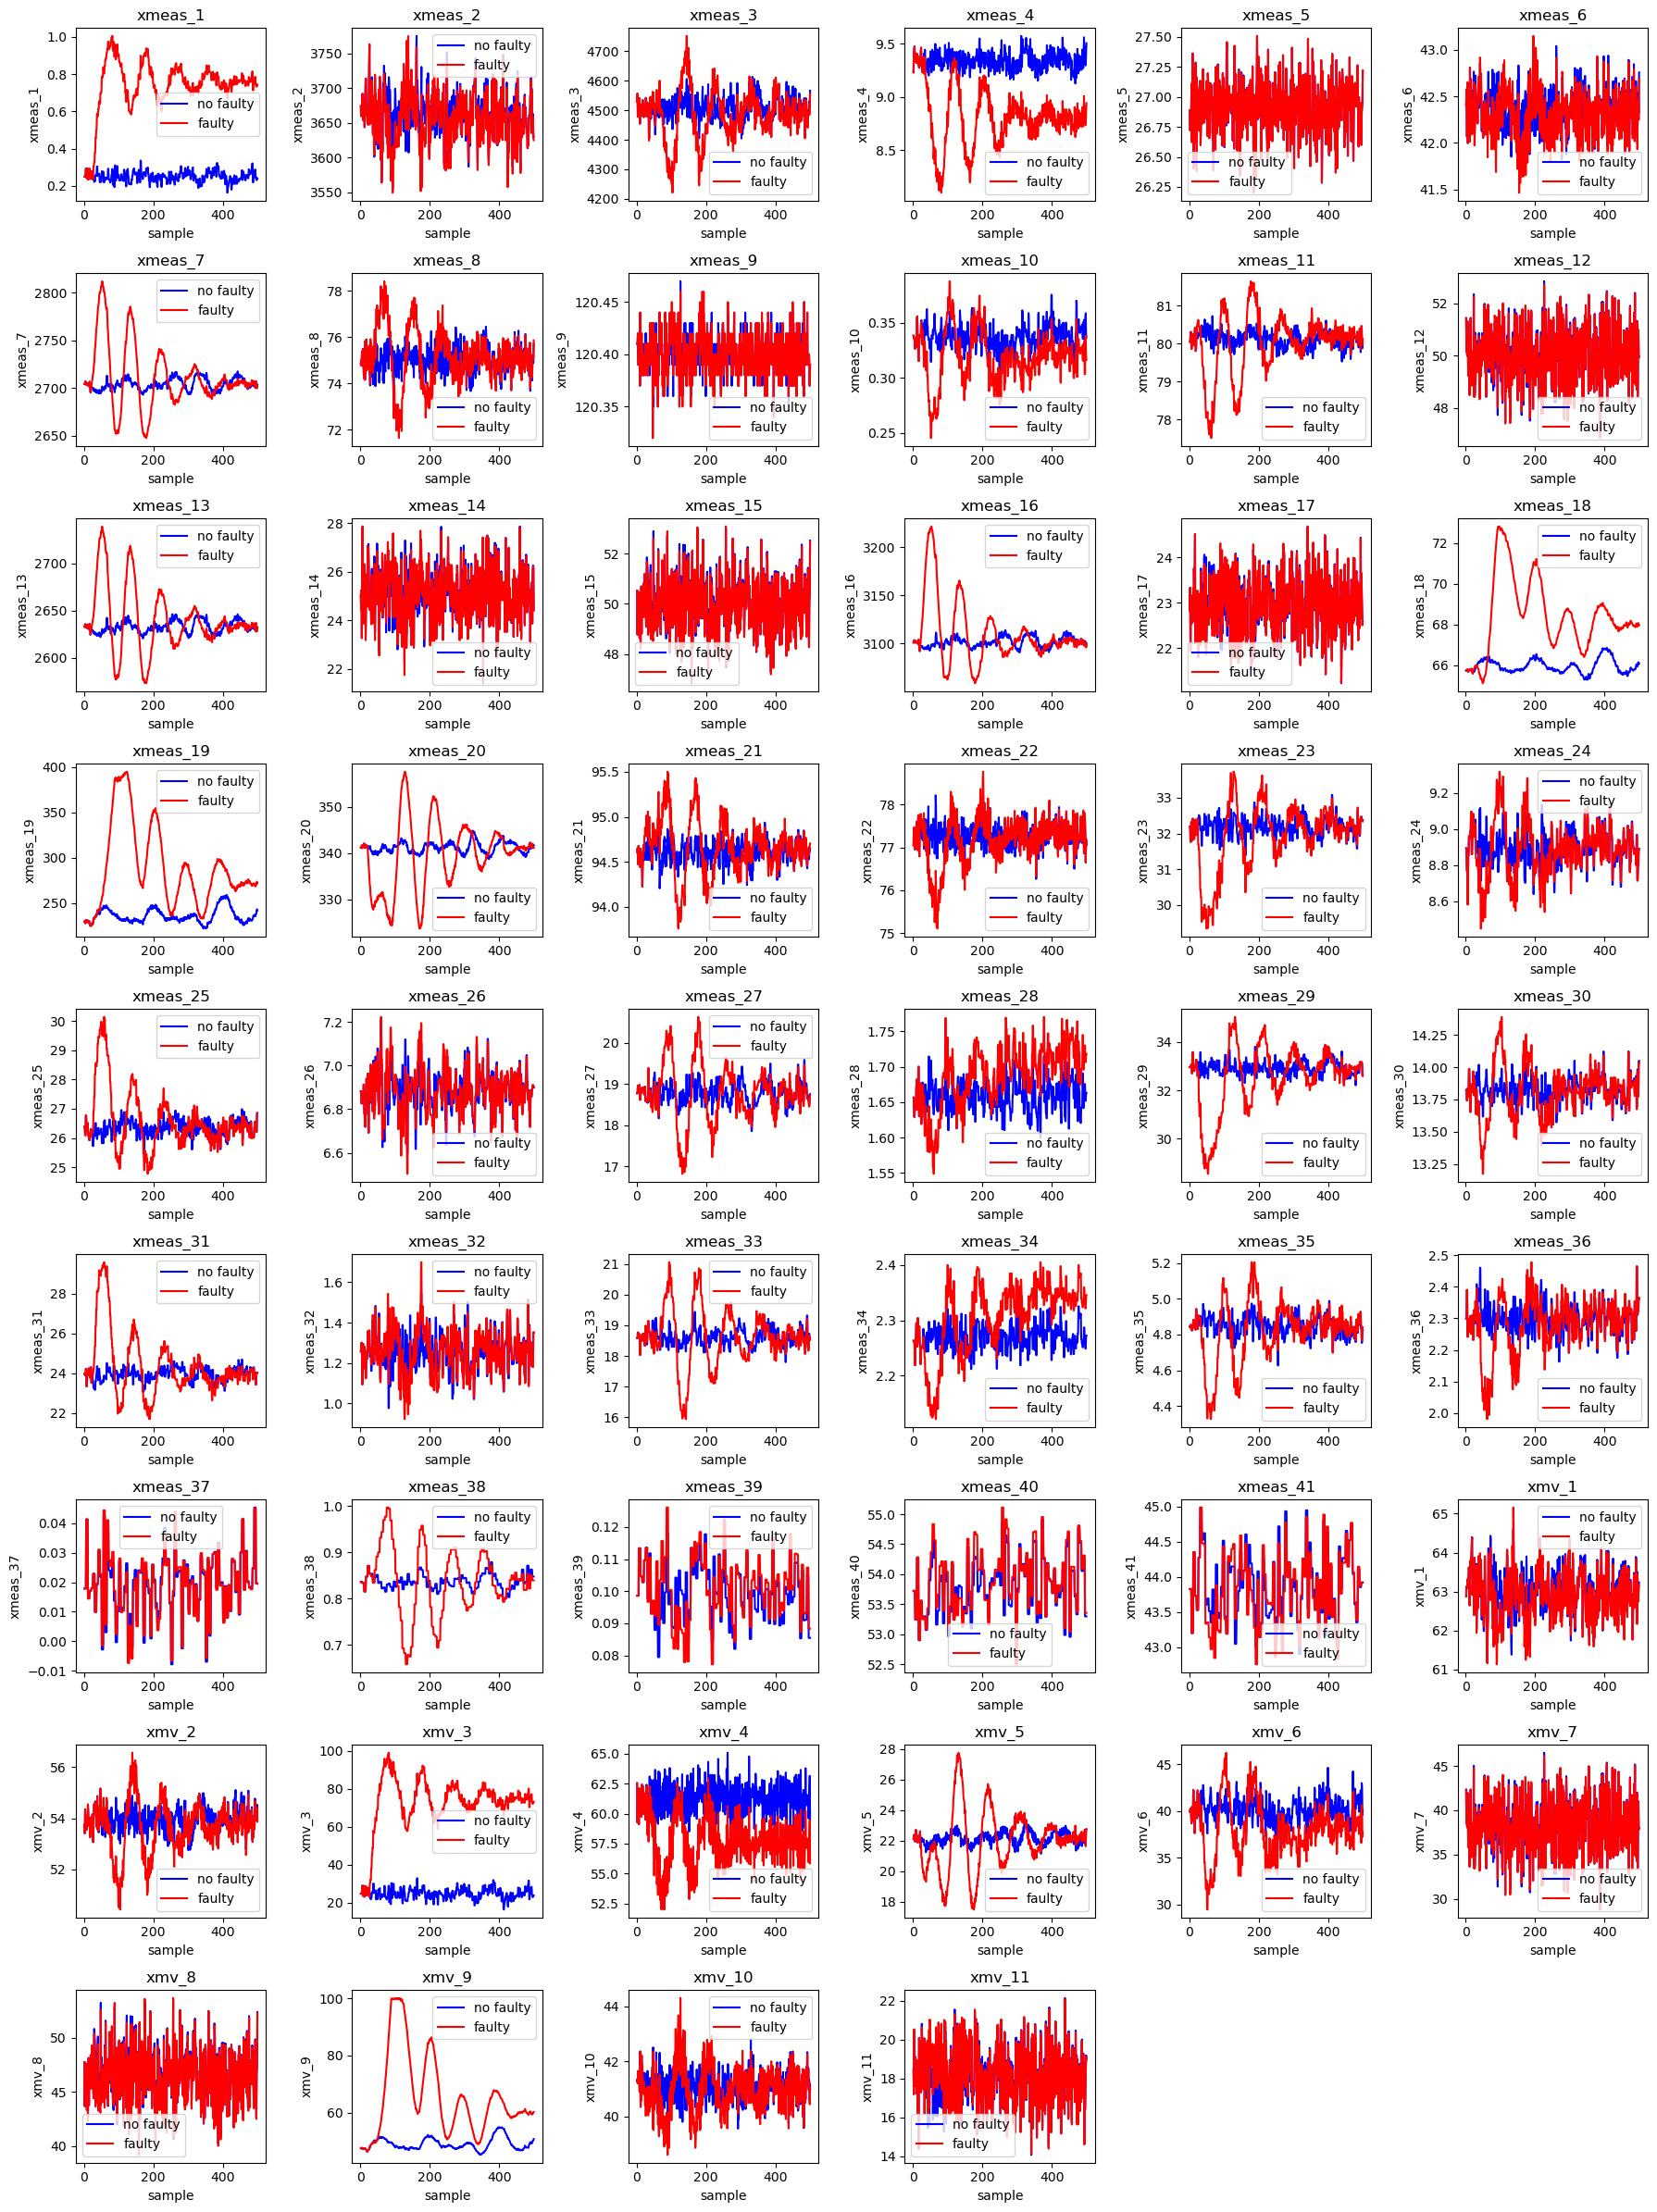

In [98]:
fig, axes = plt.subplots(nrows=9, ncols=6, figsize=(18, 24))

axes = axes.flatten()

for idx, col in enumerate(DF.columns[3:]):
    ax = axes[idx]
    ax.plot(DF['sample'], DF[col], color='b', label='no faulty')
    ax.plot(DF_faulty['sample'], DF_faulty[col], color='r', label='faulty')
    ax.set_title(col)
    ax.set_xlabel('sample')
    ax.set_ylabel(col)
    ax.legend()

for i in range(len(DF.columns[3:]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [75]:
DF.describe()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
count,500.0,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.0,1.0,250.500000,0.250589,3662.773200,4509.577200,9.344804,26.907058,42.340676,2704.357000,...,53.959550,24.654356,61.237696,22.157482,40.106614,38.281098,46.628864,49.007676,41.101936,18.092588
std,0.0,0.0,144.481833,0.028053,32.682159,38.719848,0.078888,0.214969,0.220381,5.970479,...,0.441297,2.750189,1.245239,0.395661,1.399643,3.065152,2.394748,2.080538,0.558669,1.416816
min,0.0,1.0,1.000000,0.163350,3564.600000,4400.500000,9.126600,26.201000,41.796000,2692.300000,...,52.753000,16.246000,57.813000,21.141000,35.224000,28.979000,39.204000,45.188000,39.538000,14.073000
25%,0.0,1.0,125.750000,0.232368,3642.825000,4484.500000,9.287200,26.761000,42.185750,2700.075000,...,53.678500,22.864750,60.332750,21.890750,39.309500,36.273250,45.007750,47.533750,40.757500,17.084000
50%,0.0,1.0,250.500000,0.249795,3661.750000,4506.200000,9.345900,26.908000,42.333000,2703.850000,...,53.966500,24.579000,61.314500,22.137500,40.084500,38.131500,46.632000,48.382500,41.105000,18.084000
75%,0.0,1.0,375.250000,0.268678,3682.400000,4536.475000,9.399450,27.056250,42.477750,2709.000000,...,54.242000,26.392750,62.046250,22.431500,40.909500,40.641000,48.337250,50.183750,41.484250,19.032250
max,0.0,1.0,500.000000,0.336420,3775.000000,4613.400000,9.575700,27.501000,43.040000,2717.700000,...,55.106000,32.841000,65.091000,23.351000,44.616000,46.489000,53.490000,54.864000,42.927000,22.150000


In [76]:
DF_faulty.describe()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
count,500.0,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.0,1.0,250.500000,0.737604,3656.443400,4484.893000,8.815690,26.907094,42.293714,2711.547400,...,53.664094,72.561556,57.767350,22.012474,38.029338,38.260836,46.490044,65.427994,40.976212,18.177042
std,0.0,0.0,144.481833,0.148359,36.463623,83.475534,0.275117,0.215334,0.253745,33.626121,...,0.980646,14.573362,2.064325,1.974416,2.913860,3.090253,2.402278,14.533421,0.848461,1.458498
min,1.0,1.0,1.000000,0.234150,3549.300000,4220.700000,8.097100,26.208000,41.466000,2647.800000,...,50.433000,23.044000,51.983000,17.485000,29.447000,28.797000,39.259000,46.273000,38.606000,14.130000
25%,1.0,1.0,125.750000,0.705870,3632.475000,4443.550000,8.678575,26.762500,42.105750,2696.050000,...,53.181750,69.394500,56.537250,20.908500,36.409000,36.266750,44.881500,55.928750,40.435500,17.193500
50%,1.0,1.0,250.500000,0.758395,3656.500000,4490.750000,8.814100,26.911500,42.295500,2705.100000,...,53.754500,74.681500,57.683500,22.055500,38.004000,38.094000,46.566500,60.866500,40.988000,18.206000
75%,1.0,1.0,375.250000,0.810660,3679.950000,4534.075000,8.941750,27.055000,42.450750,2721.150000,...,54.257000,79.670250,59.095750,22.902500,39.644750,40.548750,48.072750,69.710000,41.530250,19.145250
max,1.0,1.0,500.000000,1.005200,3774.800000,4751.900000,9.477600,27.509000,43.149000,2812.100000,...,56.561000,99.086000,62.919000,27.749000,46.221000,46.118000,53.685000,100.180000,44.292000,22.103000


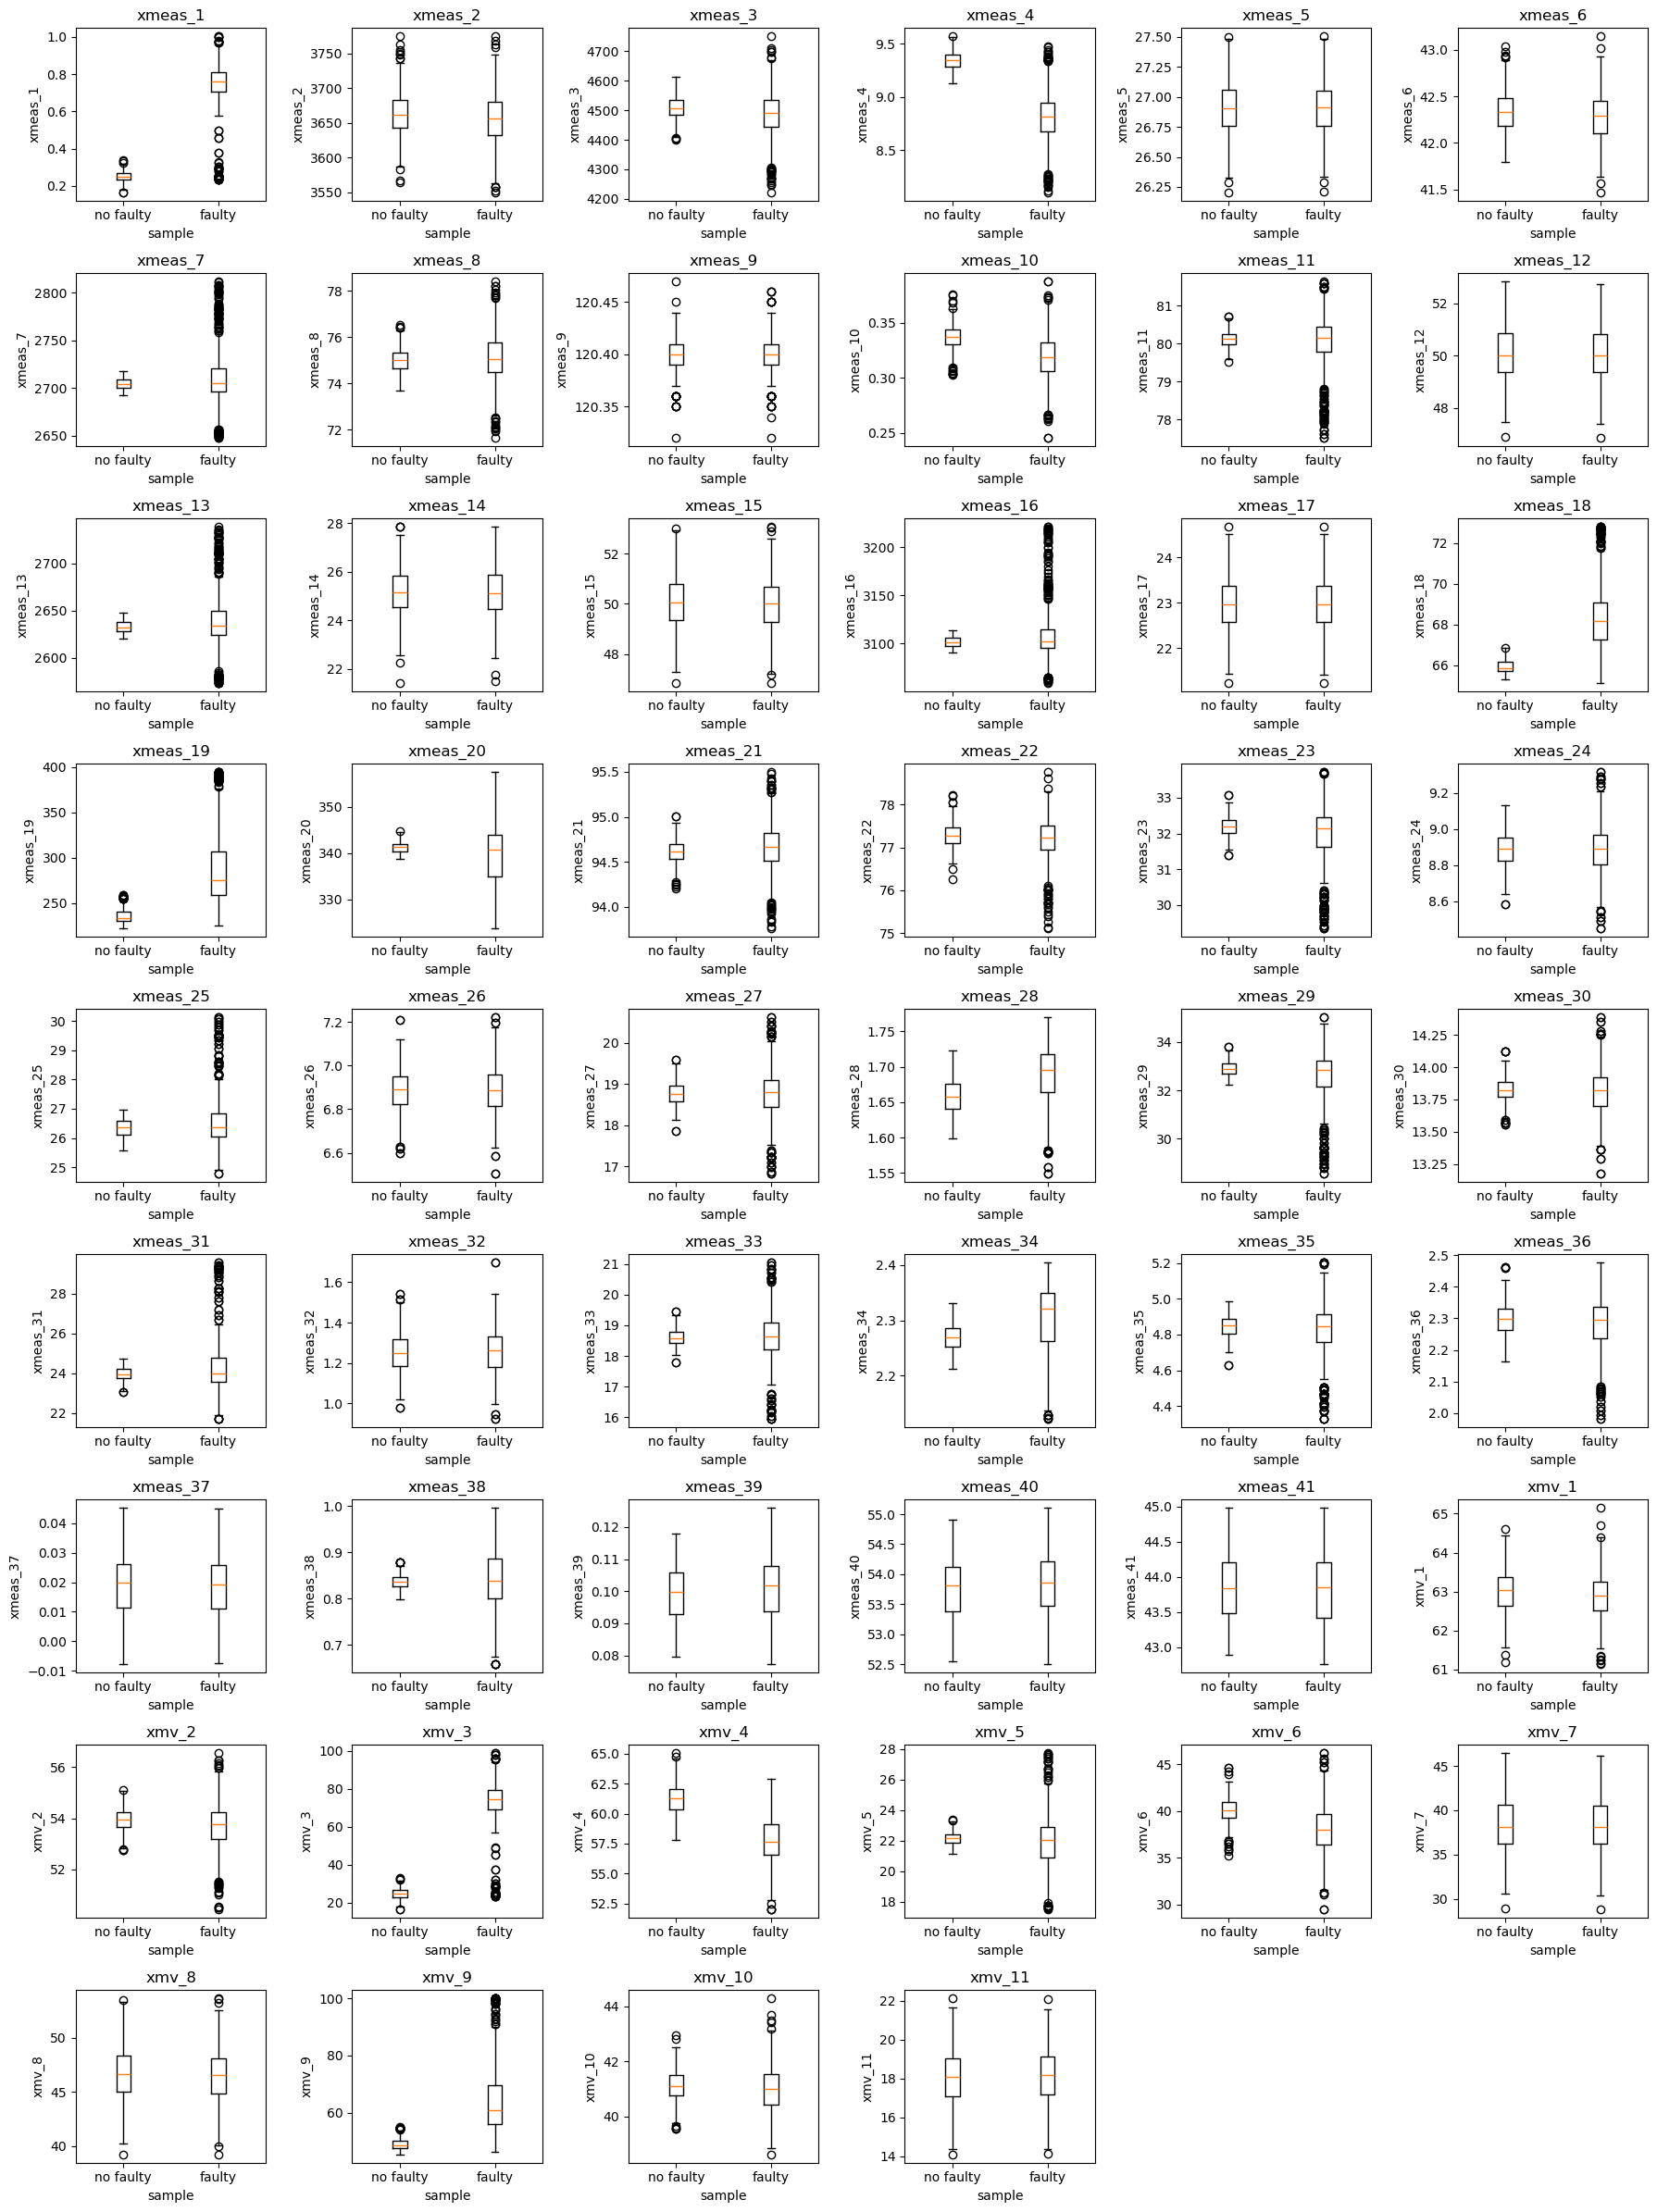

In [99]:
fig, axes = plt.subplots(nrows=9, ncols=6, figsize=(18, 24))

axes = axes.flatten()

for idx, col in enumerate(DF.columns[3:]):
    ax = axes[idx]
    columns = [DF[col], DF_faulty[col]]
    ax.boxplot(columns)
    ax.set_title(col)
    ax.set_xlabel('sample')
    ax.set_ylabel(col)
    ax.set_xticks([1, 2])
    ax.set_xticklabels(["no faulty", "faulty"])

for i in range(len(DF.columns[3:]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

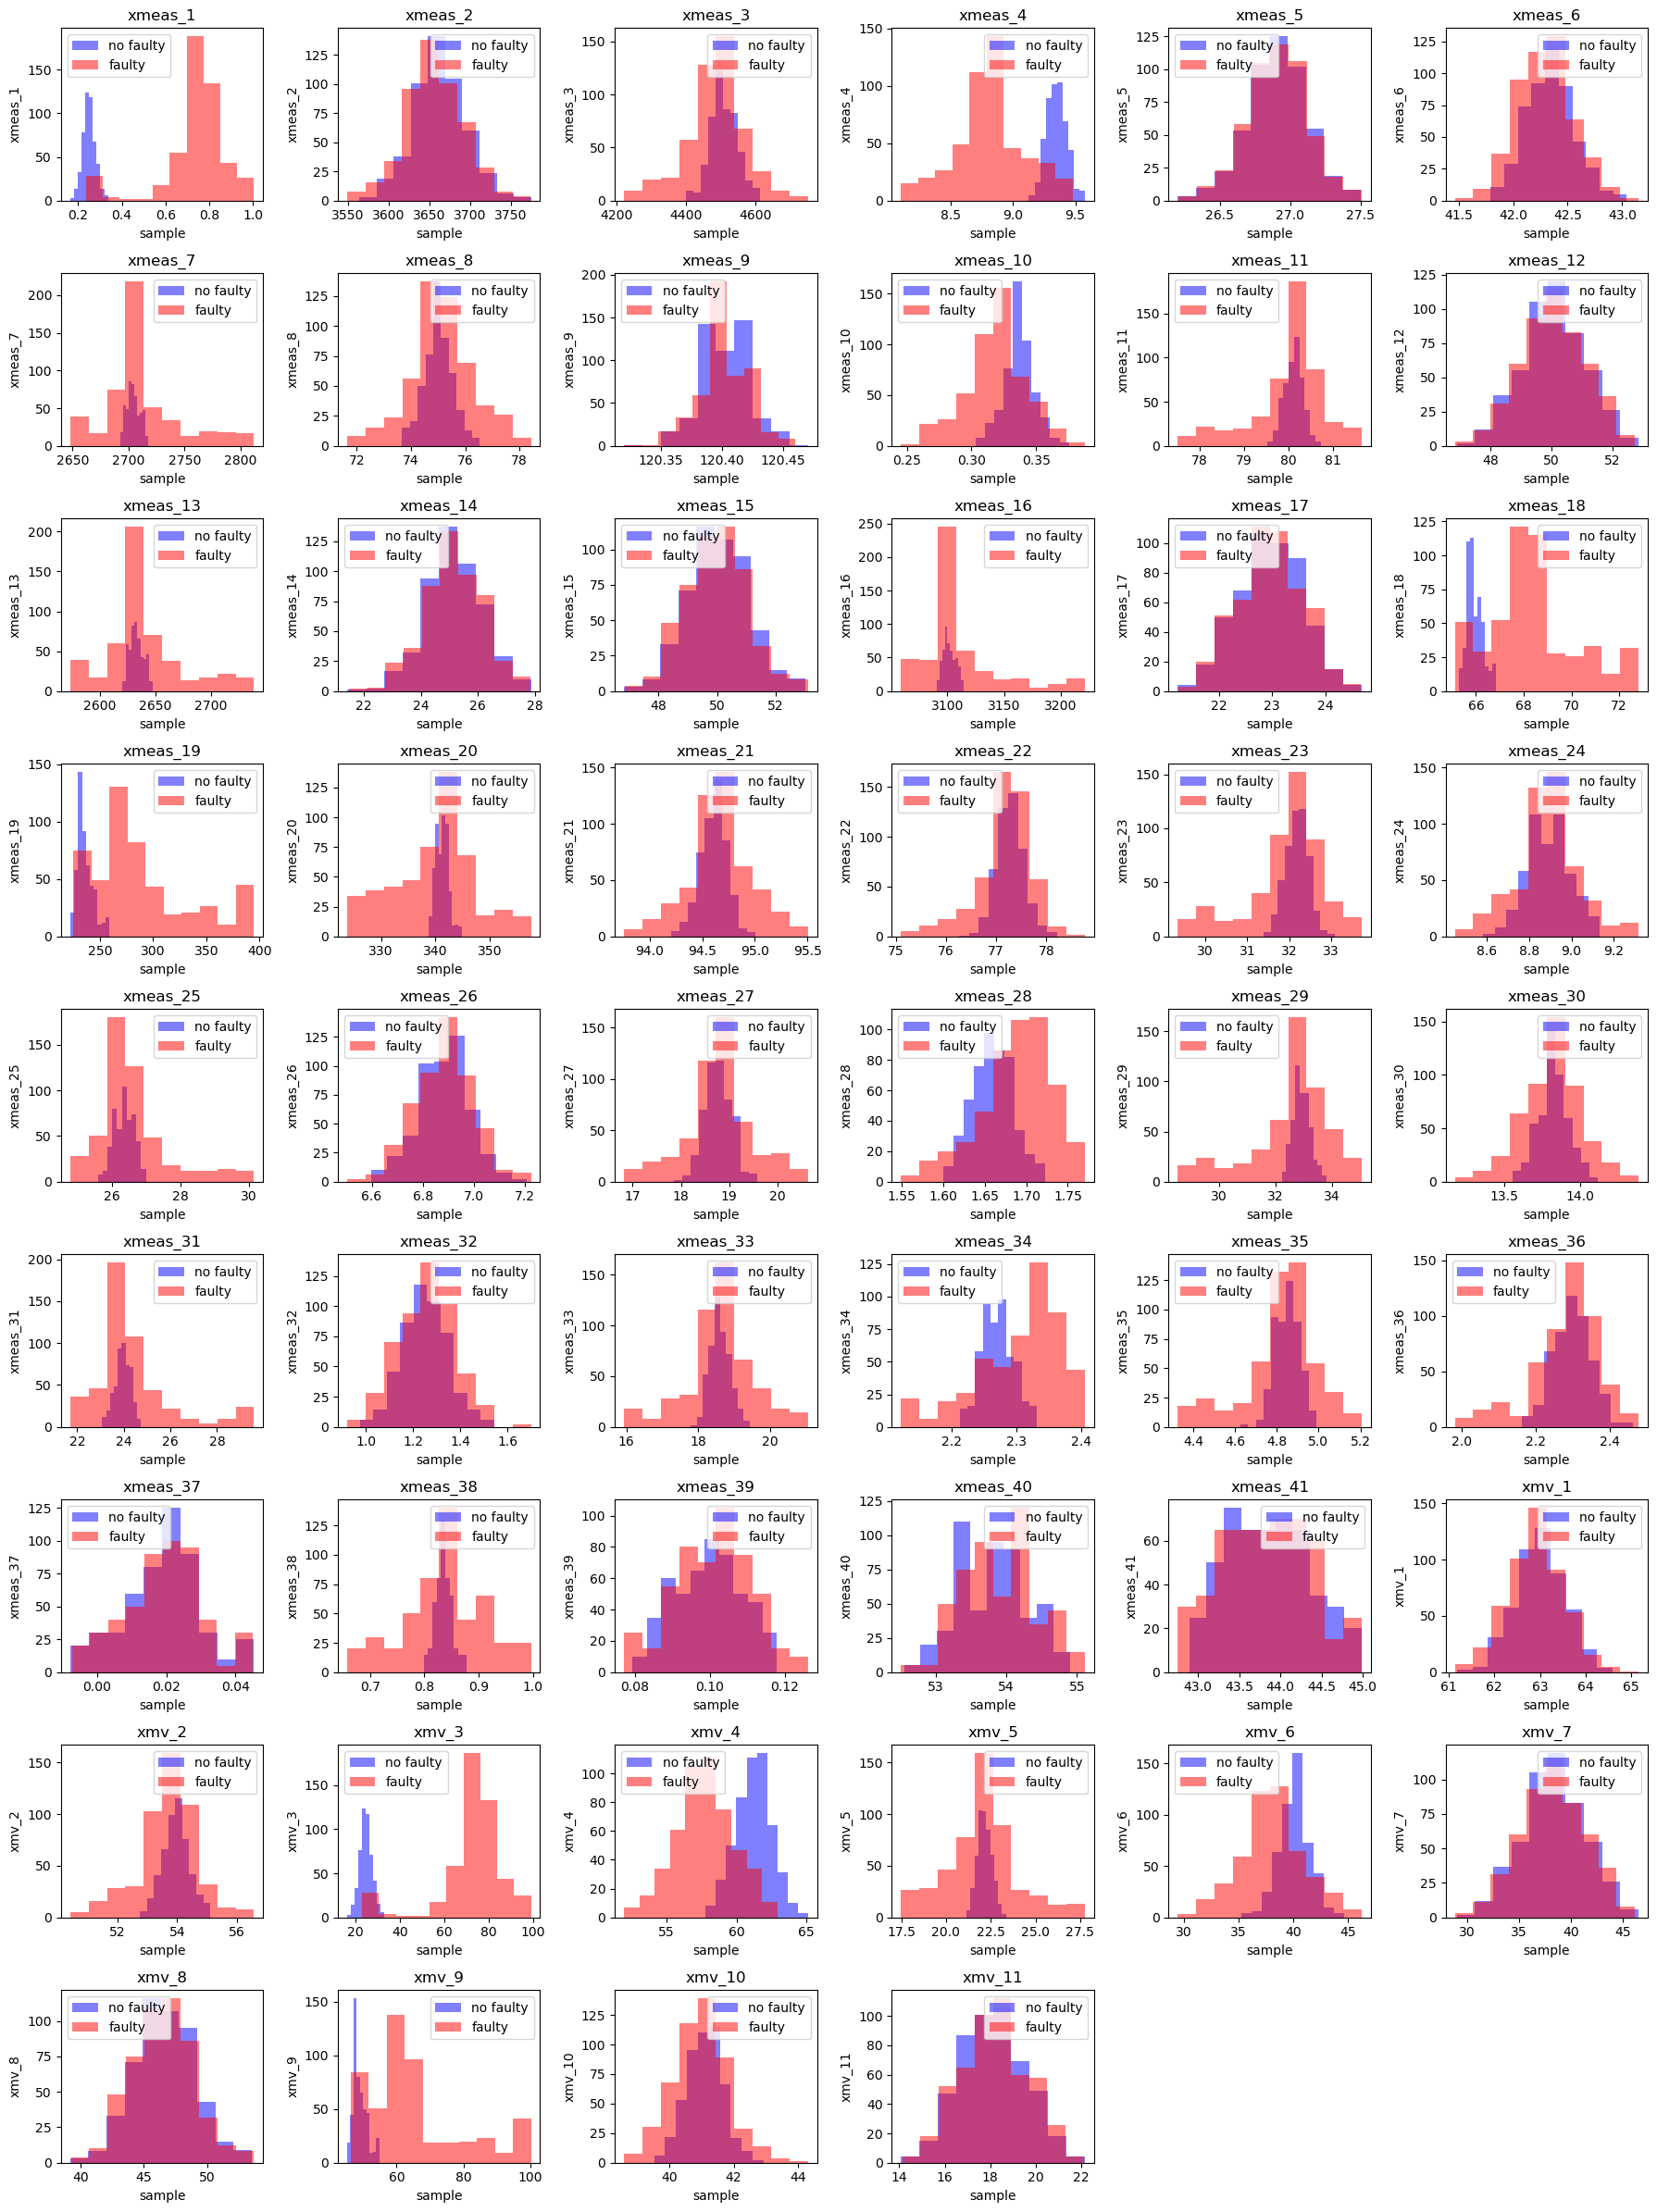

In [104]:
fig, axes = plt.subplots(nrows=9, ncols=6, figsize=(18, 24))

axes = axes.flatten()

for idx, col in enumerate(DF.columns[3:]):
    ax = axes[idx]
    columns = [DF[col], DF_faulty[col]]
    hist1 = ax.hist(columns[0], alpha=0.5, label='no faulty', color='b')
    hist2 = ax.hist(columns[1], alpha=0.5, label='faulty', color='r')
    ax.set_title(col)
    ax.set_xlabel('sample')
    ax.set_ylabel(col)
    ax.legend()

for i in range(len(DF.columns[3:]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()